In [1]:
% matplotlib notebook

In [2]:
import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
wine_data = pd.read_csv("Resources/sample_data.csv")

wine_data.head()

,Unnamed: 0,Unnamed: 0.1,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,26038,26038,Spain,"Raw, gamy aromas of herbal black fruits and we...",Finca Resalso,84,15.0,Northern Spain,Ribera del Duero,NaN,Michael Schachner,@wineschach,Emilio Moro 2015 Finca Resalso (Ribera del Du...,Tempranillo,Emilio Moro
1,115439,115439,US,This wine is mild in acidity and simple in str...,NaN,87,24.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Rutherford Ranch 2015 Chardonnay (Napa Valley),Chardonnay,Rutherford Ranch
2,111361,111361,Austria,"This is described as Brut dry, but the perfume...",Sparkling Mosi Brut,85,NaN,Österreichischer Sekt,NaN,NaN,Roger Voss,@vossroger,Hermann Moser NV Sparkling Mosi Brut Gelber Mu...,Gelber Muskateller,Hermann Moser
3,109611,109611,France,"This big, ripe wine is opulent and smooth. Wit...",Tradition,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Tradition Pinot Gris (Al...,Pinot Gris,Domaine Schoffit
4,33921,33921,US,The wine has tempting aromas like marzipan and...,NaN,86,12.0,California,California,California Other,Jim Gordon,@gordone_cellars,Leese-Fitch 2014 Chardonnay (California),Chardonnay,Leese-Fitch


In [11]:
# Clean Dataframe
countries_df = wine_data.loc[:, ["country", "points", "price"]]
countries_df = countries_df.groupby(["country"]).mean()
countries_df["points"] = countries_df["points"].astype(float).map("{:,.2f}".format)
price = countries_df["price"].astype(float).map("${:,.2f}".format)
countries_df

#points = countries_df["points"].astype(float).map("{:,.2f}".format)
#price = countries_df["price"].astype(float).map("${:,.2f}".format)

,points,price
country,,
Argentina,86.52,$23.23
Australia,87.86,$39.86
Austria,89.70,$28.96
Brazil,83.00,$28.00
Canada,89.50,$80.00
Chile,85.63,$18.26
Croatia,84.00,$13.00
France,88.82,$38.87
Germany,90.21,$43.07


<IPython.core.display.Javascript object>


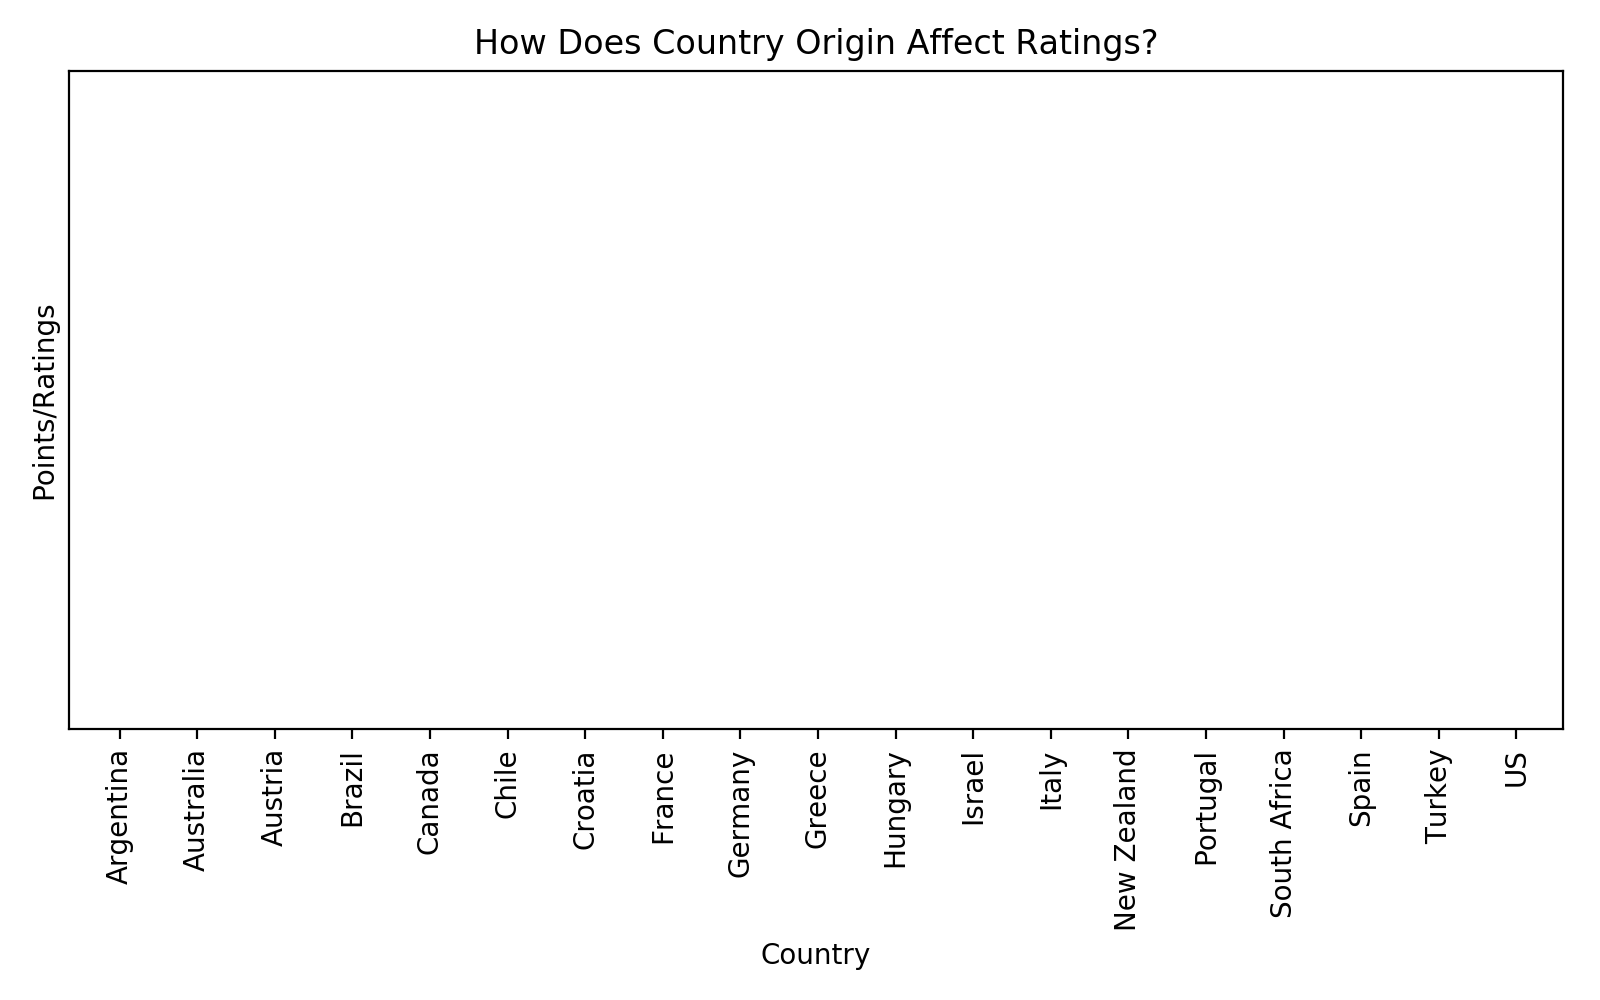

In [12]:
# Does the country of wine affect popularity? (2 Graphs)

#Country vs Points
countries = countries_df.index.values
points = countries_df["points"]

#Plot Graph
x_axis = np.arange(len(countries_df))
plt.figure(figsize=(8,5))

plt.bar(x_axis, points, color="maroon", align="edge")

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, countries, rotation="vertical")

plt.xlim(-0.25, len(x_axis))
plt.ylim((80, 95))

plt.title("How Does Country Origin Affect Ratings?")
plt.xlabel("Country")
plt.ylabel("Points/Ratings")

plt.grid(axis="y")
plt.show()
plt.tight_layout()
plt.savefig("Images/CountryVsRatings")

<IPython.core.display.Javascript object>


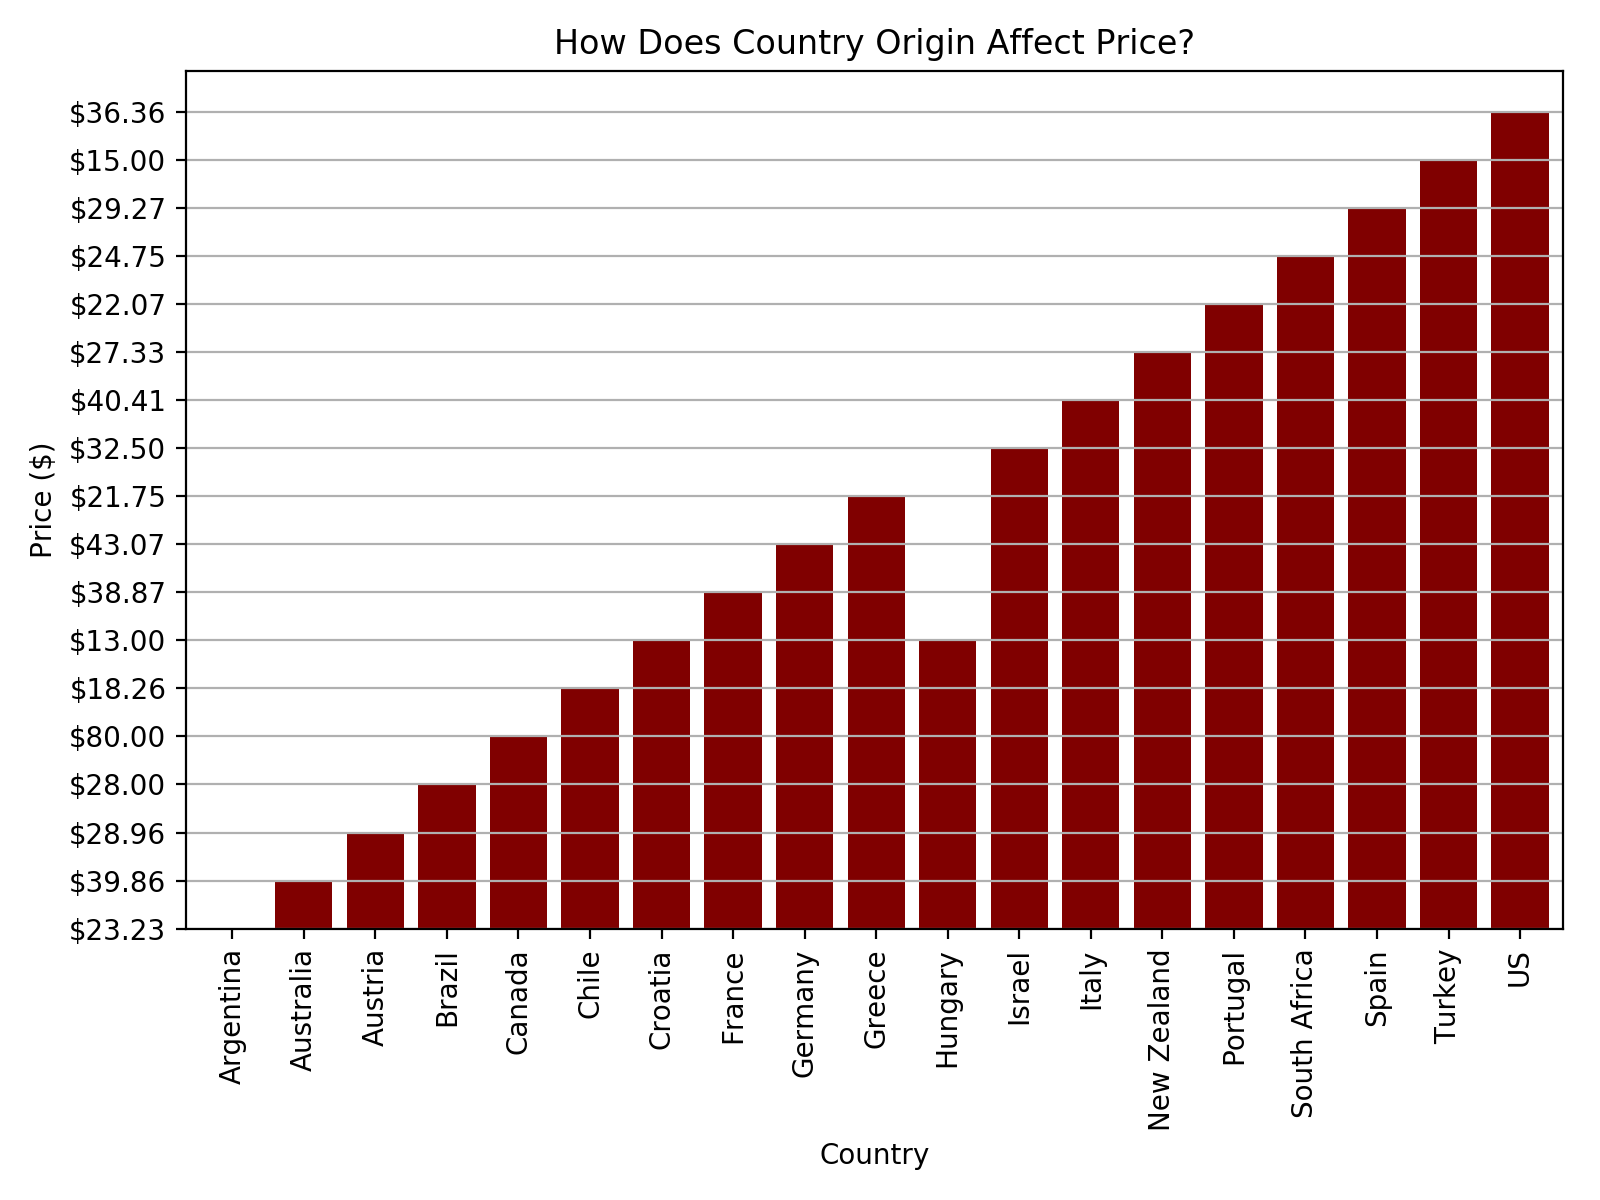

In [6]:
# Does the origin of the wine correlate with the price of wine?

#Country vs Price
countries = countries_df.index.values
price = countries_df["price"]

x_axis = np.arange(len(countries_df))
plt.figure(figsize=(8, 6))

plt.bar(x_axis, price, color="maroon", align="edge")

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, countries, rotation="vertical")

plt.xlim(-0.25, len(x_axis))

plt.title("How Does Country Origin Affect Price?")
plt.xlabel("Country")
plt.ylabel("Price ($)")

plt.grid(axis="y")
plt.show()
plt.tight_layout()
plt.savefig("Images/CountryVsPrice.png")